In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import argparse

import cv2
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [0]:
parser = argparse.ArgumentParser(add_help=False)
parser.add_argument('-f')
parser.add_argument("--image", default='/content/gdrive/My Drive/darknet/images.jpg', help="image for prediction")
parser.add_argument("--config", default='/content/gdrive/My Drive/darknet/cfg/yolov3-custom.cfg', help="YOLO config path")
parser.add_argument("--weights", default='/content/gdrive/My Drive/darknet/backup/yolov3-custom_final.weights', help="YOLO weights path")
parser.add_argument("--names", default='/content/gdrive/My Drive/darknet/obj.names', help="class names path")
args = parser.parse_args()



CONF_THRESH, NMS_THRESH = 0.5, 0.5

In [0]:
net = cv2.dnn.readNetFromDarknet(args.config, args.weights)


In [0]:
layers = net.getLayerNames()
output_layers = [layers[i[0] - 1] for i in net.getUnconnectedOutLayers()]

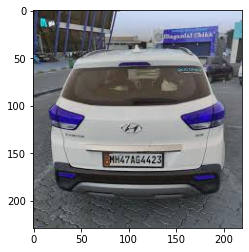

In [14]:
img = cv2.imread(args.image)
plt.imshow(img)
plt.show()


In [0]:
height, width = img.shape[:2]

blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
layer_outputs = net.forward(output_layers)

class_ids, confidences, b_boxes = [], [], []
for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > CONF_THRESH:
            center_x, center_y, w, h = (detection[0:4] * np.array([width, height, width, height])).astype('int')

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            b_boxes.append([x, y, int(w), int(h)])
            confidences.append(float(confidence))
            class_ids.append(int(class_id))

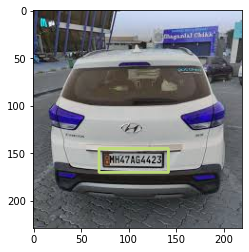

In [16]:
indices = cv2.dnn.NMSBoxes(b_boxes, confidences, CONF_THRESH, NMS_THRESH).flatten().tolist()




with open(args.names, "r") as f:
    classes = [line.strip() for line in f.readlines()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

for index in indices:
    x, y, w, h = b_boxes[index]
    cv2.rectangle(img, (x, y), (x + w, y + h), colors[index], 2)
    


plt.imshow(img)
plt.show()
